<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Online%20Courses/Data%20Analytics%20With%20Python/Program12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regression Analysis:
###Till now the linear model which we discussed were of the form:
$y=\beta_0+\beta_1.x1+\beta_1.x2+.....+\beta_p.xp$
###However, we could also have models where we have $x1^2,x2^2....$ are independent variables.
###Consider the following dataset(reynolds.csv). We want to investigate the relationship between the lenght of employment and the no. of scales sold.

In [1]:
import pandas as pd
df1=pd.read_csv('https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/reynolds.csv')
df1

,Scales_Sold,Months_Employed
0,275,41
1,296,106
2,317,76
3,376,10
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


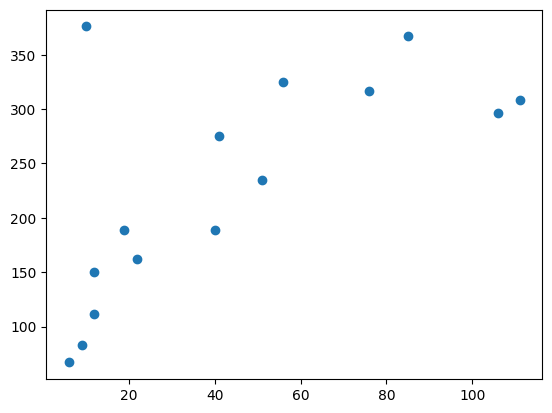

In [2]:
import matplotlib.pyplot as plt         #Scales sold vs months employed
plt.scatter(df1['Months_Employed'],df1['Scales_Sold'])
plt.show()

In [3]:
#OLS Model.
import statsmodels.api as sm
x=df1['Months_Employed']
x=sm.add_constant(x)
y=df1['Scales_Sold']
model1=sm.OLS(y,x).fit()
model1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Scales_Sold   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     10.18
Date:                Fri, 22 Sep 2023   Prob (F-statistic):            0.00709
Time:                        11:23:04   Log-Likelihood:                -85.804
No. Observations:                  15   AIC:                             175.6
Df Residuals:                      13   BIC:                             177.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             148.1602     32.832      4.513      0.001      77.231     219.089
Months_Employed     1.8729      0.587      3.191      0.007       0.605       3.141
==============================================================================
Omnibus:                       10.105   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.286
Skew:                           1.330   Prob(JB):                       0.0431
Kurtosis:                       4.726   Cond. No.                         89.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

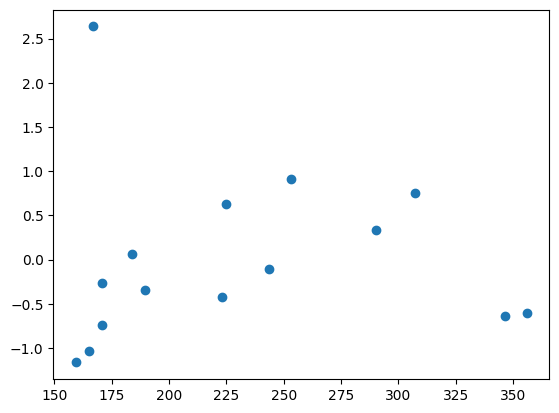

In [4]:
#Residual Plot. It suggests a curvilinear relationship
E=model1.resid_pearson
yhat=model1.predict(x)
plt.scatter(yhat,E)
plt.show()

In [5]:
#Thus lets consider x^2. Now observe that the R^2(as well as R_adj) have increased drastically
import numpy as np
x1=df1['Months_Employed']*df1['Months_Employed']
x2=np.column_stack((df1['Months_Employed'],x1))
x2=sm.add_constant(x2)
model1_new=sm.OLS(y,x2).fit()
model1_new.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Scales_Sold   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     5.967
Date:                Fri, 22 Sep 2023   Prob (F-statistic):             0.0159
Time:                        11:23:04   Log-Likelihood:                -84.963
No. Observations:                  15   AIC:                             175.9
Df Residuals:                      12   BIC:                             178.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.2740     47.715      2.227      0.046       2.313     210.235
x1             4.5682      2.332      1.959      0.074      -0.513       9.649
x2            -0.0243      0.020     -1.193      0.256      -0.069       0.020
==============================================================================
Omnibus:                       22.237   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.402
Skew:                           2.125   Prob(JB):                     5.02e-06
Kurtosis:                       7.580   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

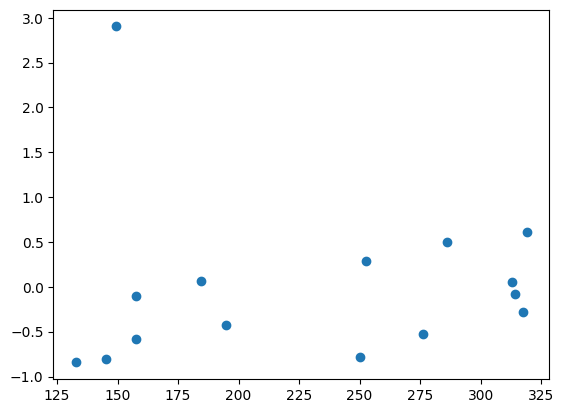

In [6]:
#Now we can see that there is a rectangular model
E1=model1_new.resid_pearson
yhat1=model1_new.predict(x2)
plt.scatter(yhat1,E1)
plt.show()

###Now lets consider the case where we have interaction between two independent variables that is we can have a variable of the form $x_1.x_2$
###Here the price and advertising(expenditure) are the two independent variables while the sales is the dependent variable.


In [7]:
df2=pd.read_csv('https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/sales.csv')
df2

,Price,Advertising,Sales
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


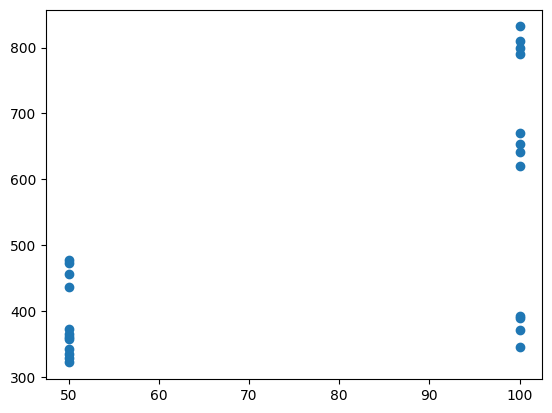

In [8]:
plt.scatter(df2['Advertising'],df2['Sales'])   #Sales vs Advertising
plt.show()

###Thus we can observe that there exists a relationship between price and advertising expenditure. If we increase price sales decrease, but if we increase advertising sales increase.


In [9]:
###Multiple regression model with interaction
x=np.column_stack((df2['Price'],df2['Advertising'],df2['Price']*df2['Advertising']))
x=sm.add_constant(x)
y=df2['Sales']
model2=sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           9.26e-17
Time:                        11:23:05   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.024    -511.218     -40.449
x1           175.0000     44.547      3.928      0.001      82.077     267.923
x2            19.6800      1.427     13.788      0.000      16.703      22.657
x3            -6.0800      0.563    -10.790      0.000      -7.255      -4.905
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   2.842
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.565
Skew:                           0.335   Prob(JB):                        0.754
Kurtosis:                       2.661   Cond. No.                     4.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###We can see that df['Price']*df['Advertising'] denoted by x3 is individually significant. The model has a good R2 and is significant in overall.
###Now let us consider the case when the dependent variable has to be tranformed
###Here the depedent variable is miles per gallon while the independent variable is weight

In [10]:
df3=pd.read_csv('https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Data_Analytics_Python/fuel.csv')
df3

,Weight,Miles_per_Gallon
0,2289,28.7
1,2113,29.2
2,2180,34.2
3,2448,27.9
4,2026,33.3
5,2702,26.4
6,2657,23.9
7,2106,30.5
8,3226,18.1
9,3213,19.5


In [11]:
#Linear model
x=df3['Weight']
y=df3['Miles_per_Gallon']
x=sm.add_constant(x)
model3=sm.OLS(y,x).fit()
model3.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Miles_per_Gallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           2.85e-07
Time:                        11:23:05   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.000      50.342      61.849
Weight        -0.0116      0.001    -12.032      0.000      -0.014      -0.009
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                0.951
Skew:                           0.690   Prob(JB):                        0.621
Kurtosis:                       3.025   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

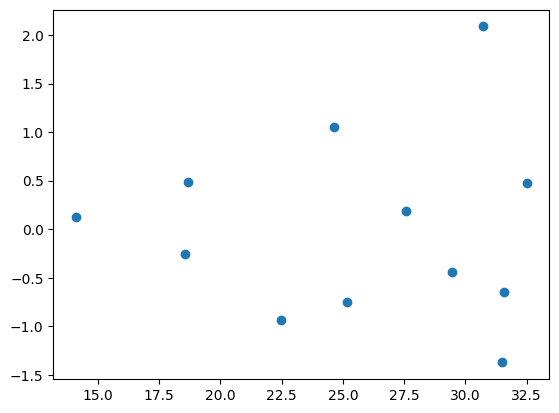

In [12]:
E=model3.resid_pearson      #Conical shaped residual plot. Suggests that we
yhat=model3.predict(x)      #have to tranform dependent variable
plt.scatter(yhat,E)
plt.show()

In [13]:
y2=np.log(y)    #Taking log of depdendent variable
model3_new=sm.OLS(y2,x).fit()
model3_new.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Miles_per_Gallon   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           9.84e-08
Time:                        11:23:05   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.000       4.303       4.746
Weight        -0.0005   3.72e-05    -13.462      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.779
Skew:                           0.484   Prob(JB):                        0.677
Kurtosis:                       2.211   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

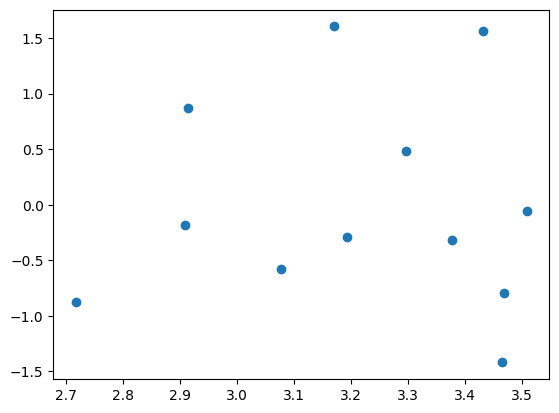

In [14]:
E=model3_new.resid_pearson      #approximately rectangular
yhat=model3_new.predict(x)
plt.scatter(yhat,E)
plt.show()

###Thus the above model is of the form:
$y=\beta_0.\beta_1^x$
###This model is still linear since taking log on both sides gives an equation similar to the linear regression model